In [12]:
from DP.dca_global import dca_global
from DP.linear_solver import linear_solver
from DP.dca_mit import dca_mit
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy

The crux of this algorithm is the following update rule:

$$ x^{(k+1)} \in argmin_{x \in C} (g(x) - (h(x^{(k)}) + \langle \nabla h(x^{(k)}), x - x^{(k)} \rangle)). $$

This should be similar to a line search restricted onto the feasible set, or something similar. Definitely look into it.

## Bernoulli distribution

In [13]:
N = 1
THETA = 0.5
EPSILON = 1.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 3 iteratons.
row 0: 0.7310585792697506	0.26894142207777316
row 1: 0.26894142073024935	0.731058577922227


## Binomial with two tries, $n=2, \epsilon=1.0$

In [14]:
N = 2
THETA = 0.3
EPSILON = 1.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 3 iteratons.
row 0: 0.26894142137304133	0.7310585786095812	0.7310585786095807
row 1: 0.7310585785928747	0.26894142135633564	0.26894142135633614


## $n = 2, \epsilon = 2$

In [15]:
N = 2
THETA = 0.5
EPSILON = 2.0

opt_q, status, history = binom_optimal_privacy(dca_global(), N, EPSILON, THETA)

print(status)
print_matrix(opt_q)

Converged after 4 iteratons.
row 0: 0.8807970779777197	0.8807970779280883	0.11920292202219503
row 1: 0.11920292202220291	0.11920292207182656	0.8807970779777229


## $n=1$ and $n=2$ optimal fisher information

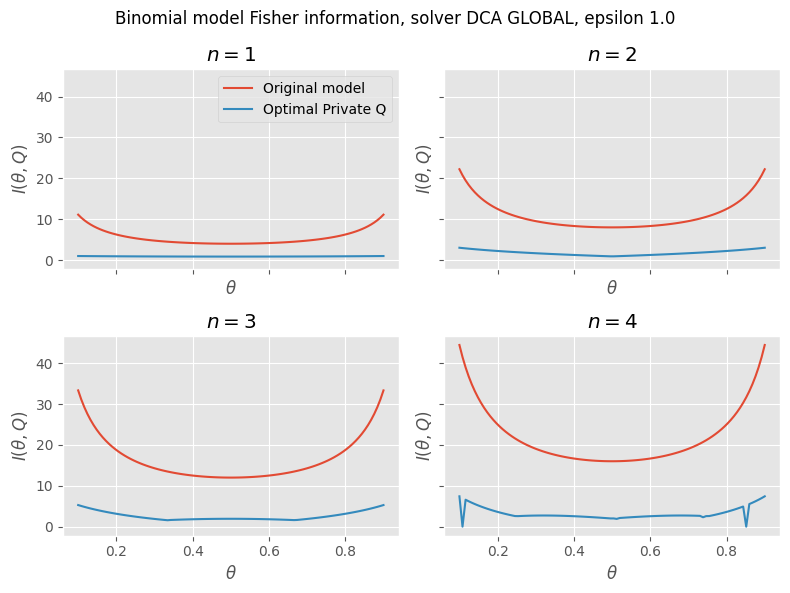

In [16]:
DP_tester.plot_fisher_infos(dca_global(), ns=[1, 2, 3, 4], epsilon=1.0)

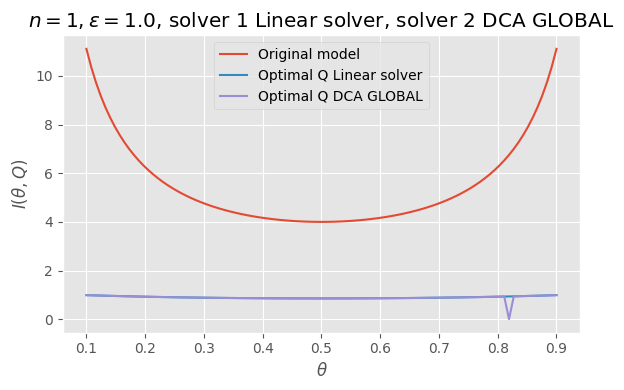

In [17]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 1, 1.0)

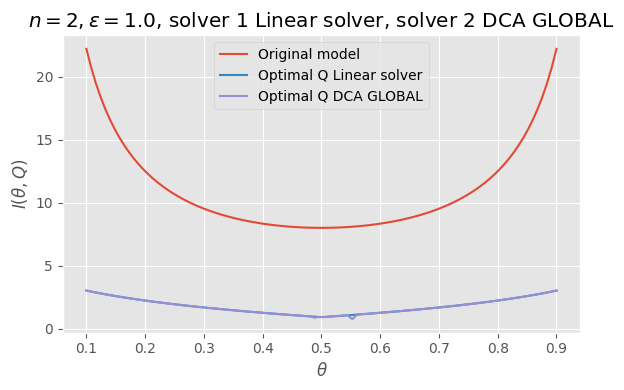

In [18]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 2, 1.0)

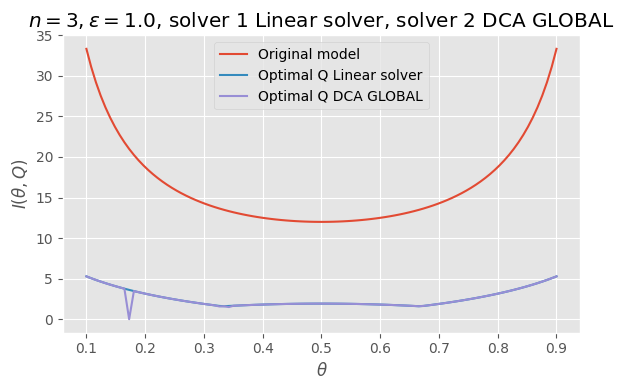

In [19]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 1.0)

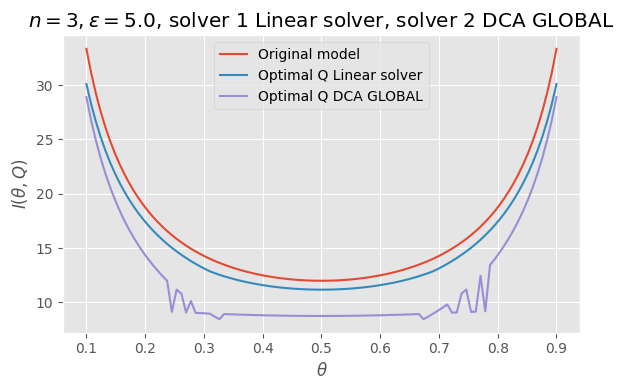

In [20]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 5.0)

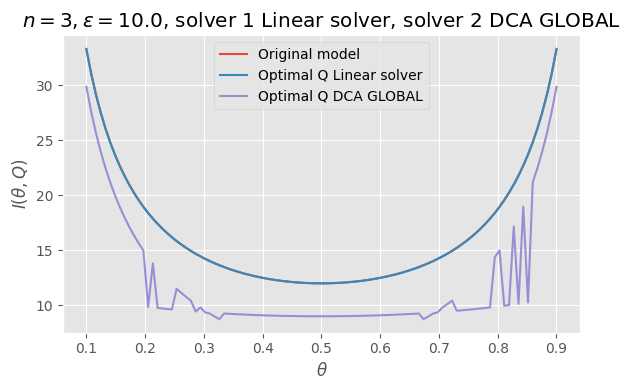

In [21]:
DP_tester.compare_fisher_two_solvers(linear_solver(), dca_global(), 3, 10.0)

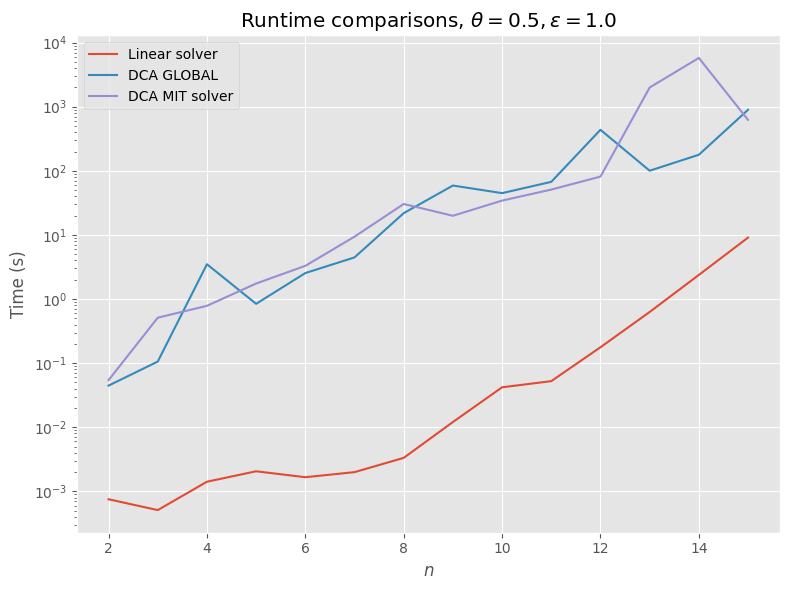

In [22]:
DP_tester.compare_runtimes([linear_solver(), dca_global(), dca_mit()], [i for i in range(2, 16)], 0.5, 1.0, log=True)